# Stock price clustering

Original dataset from the Yahoo Finance
and reconfigured by DataCamp named [Company Stock Price Movements](https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv)

In [4]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv')

In [6]:
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [9]:
df.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)

In [30]:
df.rename(columns={'Unnamed: 0':'company_name'}, inplace=True)

In [31]:
companies = df['company_name'].unique().tolist()

In [32]:
companies

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [33]:
movements = df.drop('company_name', axis=1).values

In [34]:
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

## Cluster stocks using KMeans in a pipeline

First we need to Normlize the data. Normalizer() rescales each sample independently of the other. Unlike StandarScaler() which standardizes features by removing the mean and scaling to unit variance

In [39]:
# Import dependencies
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [40]:
# Create a normalizer: normalizer
normalizer = Normalizer()

In [41]:
# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

In [42]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

In [43]:
# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [44]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [45]:
# Create a DataFrame aligning labels and companies: df
norm_df = pd.DataFrame({'labels': labels, 'companies': companies})

In [46]:
# Display norm_df sorted by cluster label
print(norm_df.sort_values('labels'))

    labels                           companies
45       0                                Sony
7        0                               Canon
59       1                               Yahoo
34       1                          Mitsubishi
30       1                          MasterCard
21       1                               Honda
20       1                          Home Depot
17       1                     Google/Alphabet
48       1                              Toyota
2        1                              Amazon
28       2                           Coca Cola
31       2                           McDonalds
56       2                            Wal-Mart
38       2                               Pepsi
46       3                      Sanofi-Aventis
52       3                            Unilever
19       3                     GlaxoSmithKline
49       3                               Total
37       3                            Novartis
42       3                   Royal Dutch Shell
43       3   

## Hierarchies of stocks

In [47]:
# Import dependencies
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

In [48]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

In [49]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

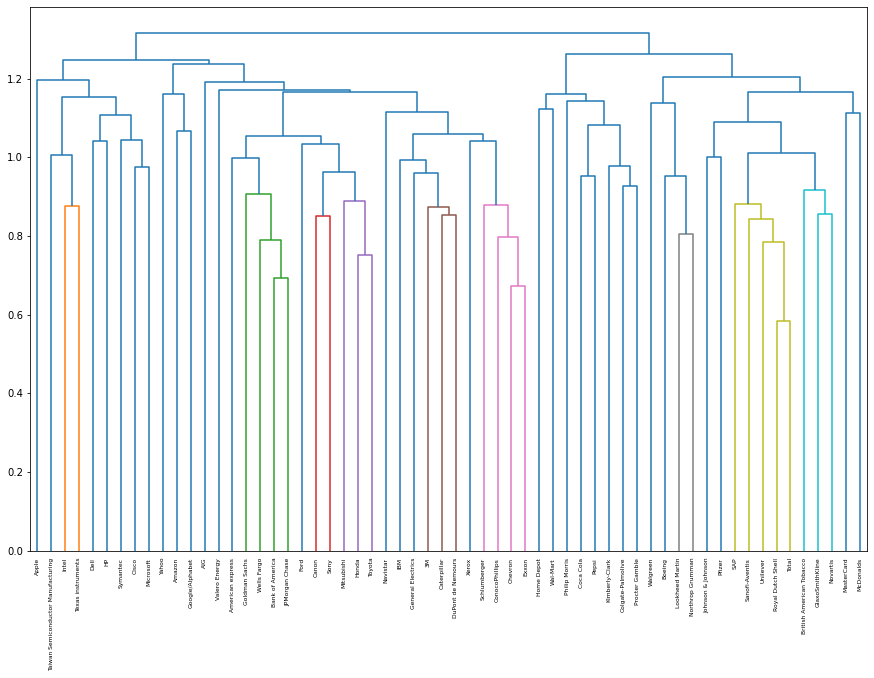

In [50]:
# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15,10))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
          ax = ax)
plt.show()